In [1]:
%matplotlib inline

In [29]:
from torchvision import datasets
import torch.optim as optim

In [3]:
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
(<PIL.Image.Image image mode=L size=28x28 at 0x7FC2D8F1F350>, 5)


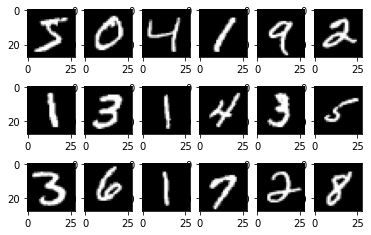

In [4]:
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image, cmap='gray')

In [5]:
from torchvision import transforms
# transform the image data type to a 28x28 matrix of numbers
img_to_tensor = transforms.ToTensor()

In [6]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [7]:
mnist_train = datasets.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]
print(mnist_train[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [8]:
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

In [9]:
import torch
import torch.nn as nn
example_model = nn.Linear(50, 1) # assume 50 features, 1 linear output

In [10]:
weight, bias = list(example_model.parameters())
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[ 0.1121,  0.1183,  0.0390, -0.1262, -0.1263,  0.1394, -0.1130, -0.0851,
         -0.1155,  0.0134, -0.1238, -0.0004, -0.1263, -0.1230,  0.0564, -0.0585,
          0.1003, -0.0703,  0.0538,  0.1313,  0.1092, -0.0088,  0.0418,  0.0914,
         -0.0273, -0.0295,  0.0973, -0.0453,  0.0495,  0.0182,  0.0271, -0.0917,
         -0.1413,  0.0311, -0.0881,  0.0167,  0.0832, -0.0651,  0.0142,  0.0384,
         -0.1029, -0.0741,  0.0244,  0.0660, -0.1156, -0.1267, -0.1028, -0.1131,
         -0.0086, -0.0692]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([-0.0156], requires_grad=True)
torch.Size([1])


In [11]:
model = nn.Linear(784, 10)

In [12]:
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [13]:
x = torch.randn(50)
x.shape

torch.Size([50])

In [14]:
y = example_model(x)
y.shape

torch.Size([1])

In [15]:
torch.sigmoid(example_model(x))

tensor([0.5052], grad_fn=<SigmoidBackward>)

In [16]:
x = img_tensor.view(1, 784)

In [17]:
z = model(x)
print(z)

tensor([[ 0.2198,  0.2397,  0.0255,  0.1651, -0.0392,  0.1358, -0.1063,  0.0244,
         -0.2768, -0.4406]], grad_fn=<AddmmBackward>)


In [18]:
y = torch.softmax(z, dim=1)
print(y)

tensor([[0.1227, 0.1252, 0.1010, 0.1162, 0.0947, 0.1128, 0.0885, 0.1009, 0.0747,
         0.0634]], grad_fn=<SoftmaxBackward>)


In [21]:
label = torch.Tensor([8]).long()
criterion = nn.CrossEntropyLoss()
loss = criterion(y, label)

print(y)
print(label)

tensor([[0.1227, 0.1252, 0.1010, 0.1162, 0.0947, 0.1128, 0.0885, 0.1009, 0.0747,
         0.0634]], grad_fn=<SoftmaxBackward>)
tensor([8])


In [20]:
print(loss)

tensor(2.3281, grad_fn=<NllLossBackward>)


In [47]:
def run_gradient_descent(model, batch_size=64, learning_rate=0.01, weight_decay=0, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    iters, losses = [], []
    iters_sub, train_acc, val_acc  = [], [] ,[]
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for xs, ts in iter(train_loader):
            if len(ts) != batch_size:
                continue
            xs = xs.view(-1, 784)    # flatten the image. The -1 is a wildcard
            zs = model(xs)
            
            print(f"pred {zs.shape}")
            print(ts.shape)
            
            print(zs.dtype)
            print(ts.dtype)
            
            loss = criterion(zs, ts) # compute the total loss
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # compute updates for each parameter
            # make the updates for each parameter
            # a clean up step for PyTorch
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss
            if n % 10 == 0:
                iters_sub.append(n)
                train_acc.append(get_accuracy(model, mnist_train))
                val_acc.append(get_accuracy(model, mnist_val))
            # increment the iteration number
            n += 1
    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters_sub, train_acc, label="Train")
    plt.plot(iters_sub, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    return model

In [48]:
def get_accuracy(model, data):
    loader = torch.utils.data.DataLoader(data, batch_size=500)
    correct, total = 0, 0
    for xs, ts in loader:
        xs = xs.view(-1, 784) # flatten the image
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(ts.view_as(pred)).sum().item()
        total += int(ts.shape[0])
        return correct / total

pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Si

torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred torch.Size([64, 10])
torch.Size([64])
torch.float32
torch.int64
pred tor

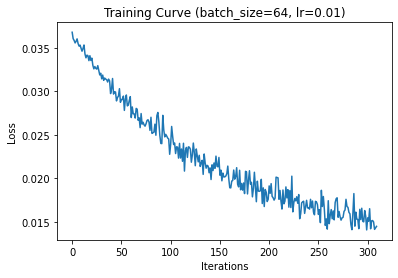

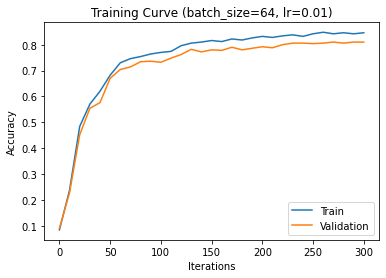

Linear(in_features=784, out_features=10, bias=True)

In [49]:
model = nn.Linear(784, 10)
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)